In [1]:
%matplotlib inline
from datetime import datetime
from datetime import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('alert button-1.csv')

print(datetime.utcfromtimestamp(int(df.timestamp.min())).strftime('%Y-%m-%d %H:%M:%S %a'))
print(datetime.utcfromtimestamp(int(df.timestamp.max())).strftime('%Y-%m-%d %H:%M:%S %a'))

2016-01-25 00:00:17 Mon
2016-01-31 23:59:43 Sun


In [3]:
def part_of_day(hour):
    if 2 <= hour <= 5: return 'night'
    else: return 'day'
#     if 7 <= hour <= 22: return 'day'
#     if hour == 23: return 'night'

    
def get_hour(timestamp):    
    return datetime.utcfromtimestamp(int(timestamp)).time().hour


df['hour'] = df.timestamp.map(get_hour)
df['segment'] = df.hour.map(part_of_day)

df.head()

,device_id,timestamp,x,y,hour,segment
0,11382,1453723418,3029,6217,12,day
1,52106,1453797980,3459,5654,8,day
2,31296,1453731250,3295,6261,14,day
3,31296,1453731277,3267,6247,14,day
4,31296,1453732707,3311,6255,14,day


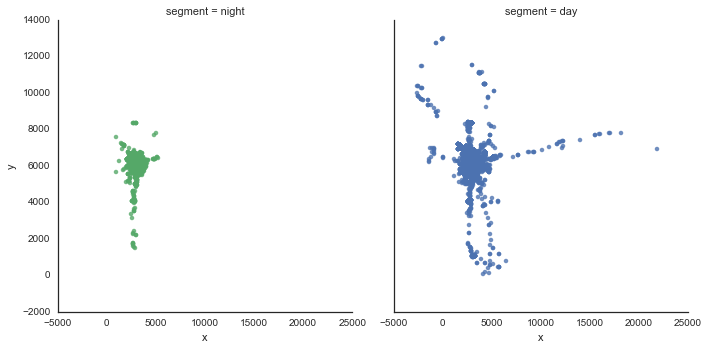

In [10]:
sns.set(style='white')
df1 = df[(df.y > 0) & (df.x < 60000)]
sns.lmplot(x='x', y = 'y', hue='segment', col='segment', col_order= ['night', 'day'], data=df1, fit_reg=False)


In [163]:
for i in people[:100]:
    df1 = df[df.device_id == i]
#     sns.lmplot(x='x', y = 'y', hue='segment', col='segment', col_order= ['night', 'day'], data=df1, fit_reg=False)
    img = sns.lmplot(x='x', y = 'y', hue='segment', data=df1, fit_reg=False)
#     fig = img.fig()
#     fig.savefig(i)
#     fig.clf()
    

In [ ]:
for i in people:
    plt.plot(df.x[df.device_id == i], df.y[df.device_id == i])
    heatmap, xedges, yedges = np.histogram2d(df.x[df.device_id == i], df.y[df.device_id == i], bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.clf()
    plt.imshow(heatmap, extent=extent)
    plt.show()